In [1]:
# Import modules
import sys,re
import os, anndata
#import dandelion as ddl
import pandas as pd
import scanpy as sc
import lpy # local lpy.py file
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
#ddl.logging.print_header()

In [2]:
# Extract CVID subset
adata = anndata.read_h5ad("int5.h5ad")
adata = adata[adata.obs["StudyName"] == "Javi"]
print(adata.obs["demultiplexed"].value_counts())
#renaming sample 
adata.obs_names = [ re.sub("-1", "",
                re.sub("T1_C-0", "B1VDJ",
               re.sub("T2_C-0", "B2VDJ",
               re.sub("T3_C-0", "B3VDJ",
               re.sub("I-O-5_8-N_C-0", "BBVDJ",
               re.sub("I-O-6_9-N_C-0", "BPVDJ",
               re.sub("I-O-7-N_C-0", "BCVDJ",x))))))) for x in adata.obs_names]
adata.write_h5ad("CVIDonly.h5ad")

In [3]:
adata.write_h5ad("CVIDonly.h5ad")

In [4]:
adata = anndata.read_h5ad("CVIDonly.h5ad")

dandelion==0.2.5.dev6 pandas==1.4.3 numpy==1.19.5 matplotlib==3.5.2 networkx==2.5 scipy==1.6.1


<ipython-input-3-8cc26eda2b4c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Preparing data: 7984it [00:03, 2303.89it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 4068/4068 [00:33<00:00, 122.04it/s]
/opt/conda/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:59: UserWarning: Error while trying to convert the column "d_call". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>).
R[write to console]: Error in (function (db, sequenceColumn = "junction", vCallColumn = "v_call",  : 
  24 cell(s) with multiple heavy chains found. One heavy chain per cell is expected.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  librar

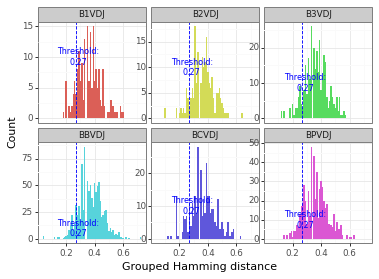

In [5]:
import sys,re
import os, anndata
import dandelion as ddl
import pandas as pd
ddl.logging.print_header()
bcr_files = []
for sample in ["B1VDJ","B2VDJ","B3VDJ","BBVDJ","BPVDJ","BCVDJ"]:
    file_location = "~/dandelion/" +sample +'/dandelion/filtered_contig_dandelion.tsv'
    bcr_files.append(pd.read_csv(file_location, sep = '\t'))

bcr = bcr_files[0].append(bcr_files[1:])
bcr.reset_index(inplace = True, drop = True)
bcr

vdj, adata = ddl.pp.filter_contigs(bcr, adata, filter_rna = False)
ddl.pp.calculate_threshold(vdj)

In [6]:
ddl.tl.define_clones(vdj, key_added = 'changeo_clone_id')
vdj

Dandelion class object with n_obs = 3303 and n_contigs = 6658
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [7]:
ddl.tl.find_clones(vdj)

Finding clones based on B cell VDJ chains : 100%|██████████| 229/229 [00:00<00:00, 1165.82it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 3303/3303 [00:00<00:00, 317368.87it/s]


In [8]:
ddl.tl.generate_network(vdj)

Setting up data: 6658it [00:02, 2254.66it/s]
Linking edges : 100%|██████████| 3055/3055 [00:00<00:00, 7502.71it/s]


To benefit from faster layout computation, please install graph-tool: conda install -c conda-forge graph-tool


In [9]:
#This function does not work memory alloc goes through the roof
#ddl.tl.transfer(adata, vdj, collapse_nodes =False) # this will include singletons.

# so only a subset is called:
overwrite = True
for x in vdj.metadata.columns:
    if x not in adata.obs.columns:
        adata.obs[x] = pd.Series(vdj.metadata[x])
    elif overwrite is True:
        adata.obs[x] = pd.Series(vdj.metadata[x])
    if adata.obs[x].dtype == "bool":
        adata.obs[x] = [str(x) for x in self.obs[x]]

if overwrite is not None and overwrite is not True:
    if not type(overwrite) is list:
        overwrite = [overwrite]
    for ow in overwrite:
        adata.obs[ow] = pd.Series(vdj.metadata[ow])
        if type_check(vdj.metadata, ow):
            adata.obs[ow].replace(np.nan, "No_contig", inplace=True)


In [10]:
adata.obs["v_call_genotyped_VDJ"]

B1VDJ_AAACCTGAGATAGCAT         NaN
B1VDJ_AAACCTGAGCTTATCG    IGHV3-21
B1VDJ_AAACCTGAGGGATCTG         NaN
B1VDJ_AAACCTGAGGGTATCG         NaN
B1VDJ_AAACCTGAGGGTCTCC         NaN
                            ...   
BCVDJ_TTTGTCATCCTAGTGA         NaN
BCVDJ_TTTGTCATCGGCGCTA         NaN
BCVDJ_TTTGTCATCGTCTGAA         NaN
BCVDJ_TTTGTCATCTGCGACG         NaN
BCVDJ_TTTGTCATCTTGCAAG         NaN
Name: v_call_genotyped_VDJ, Length: 134366, dtype: object

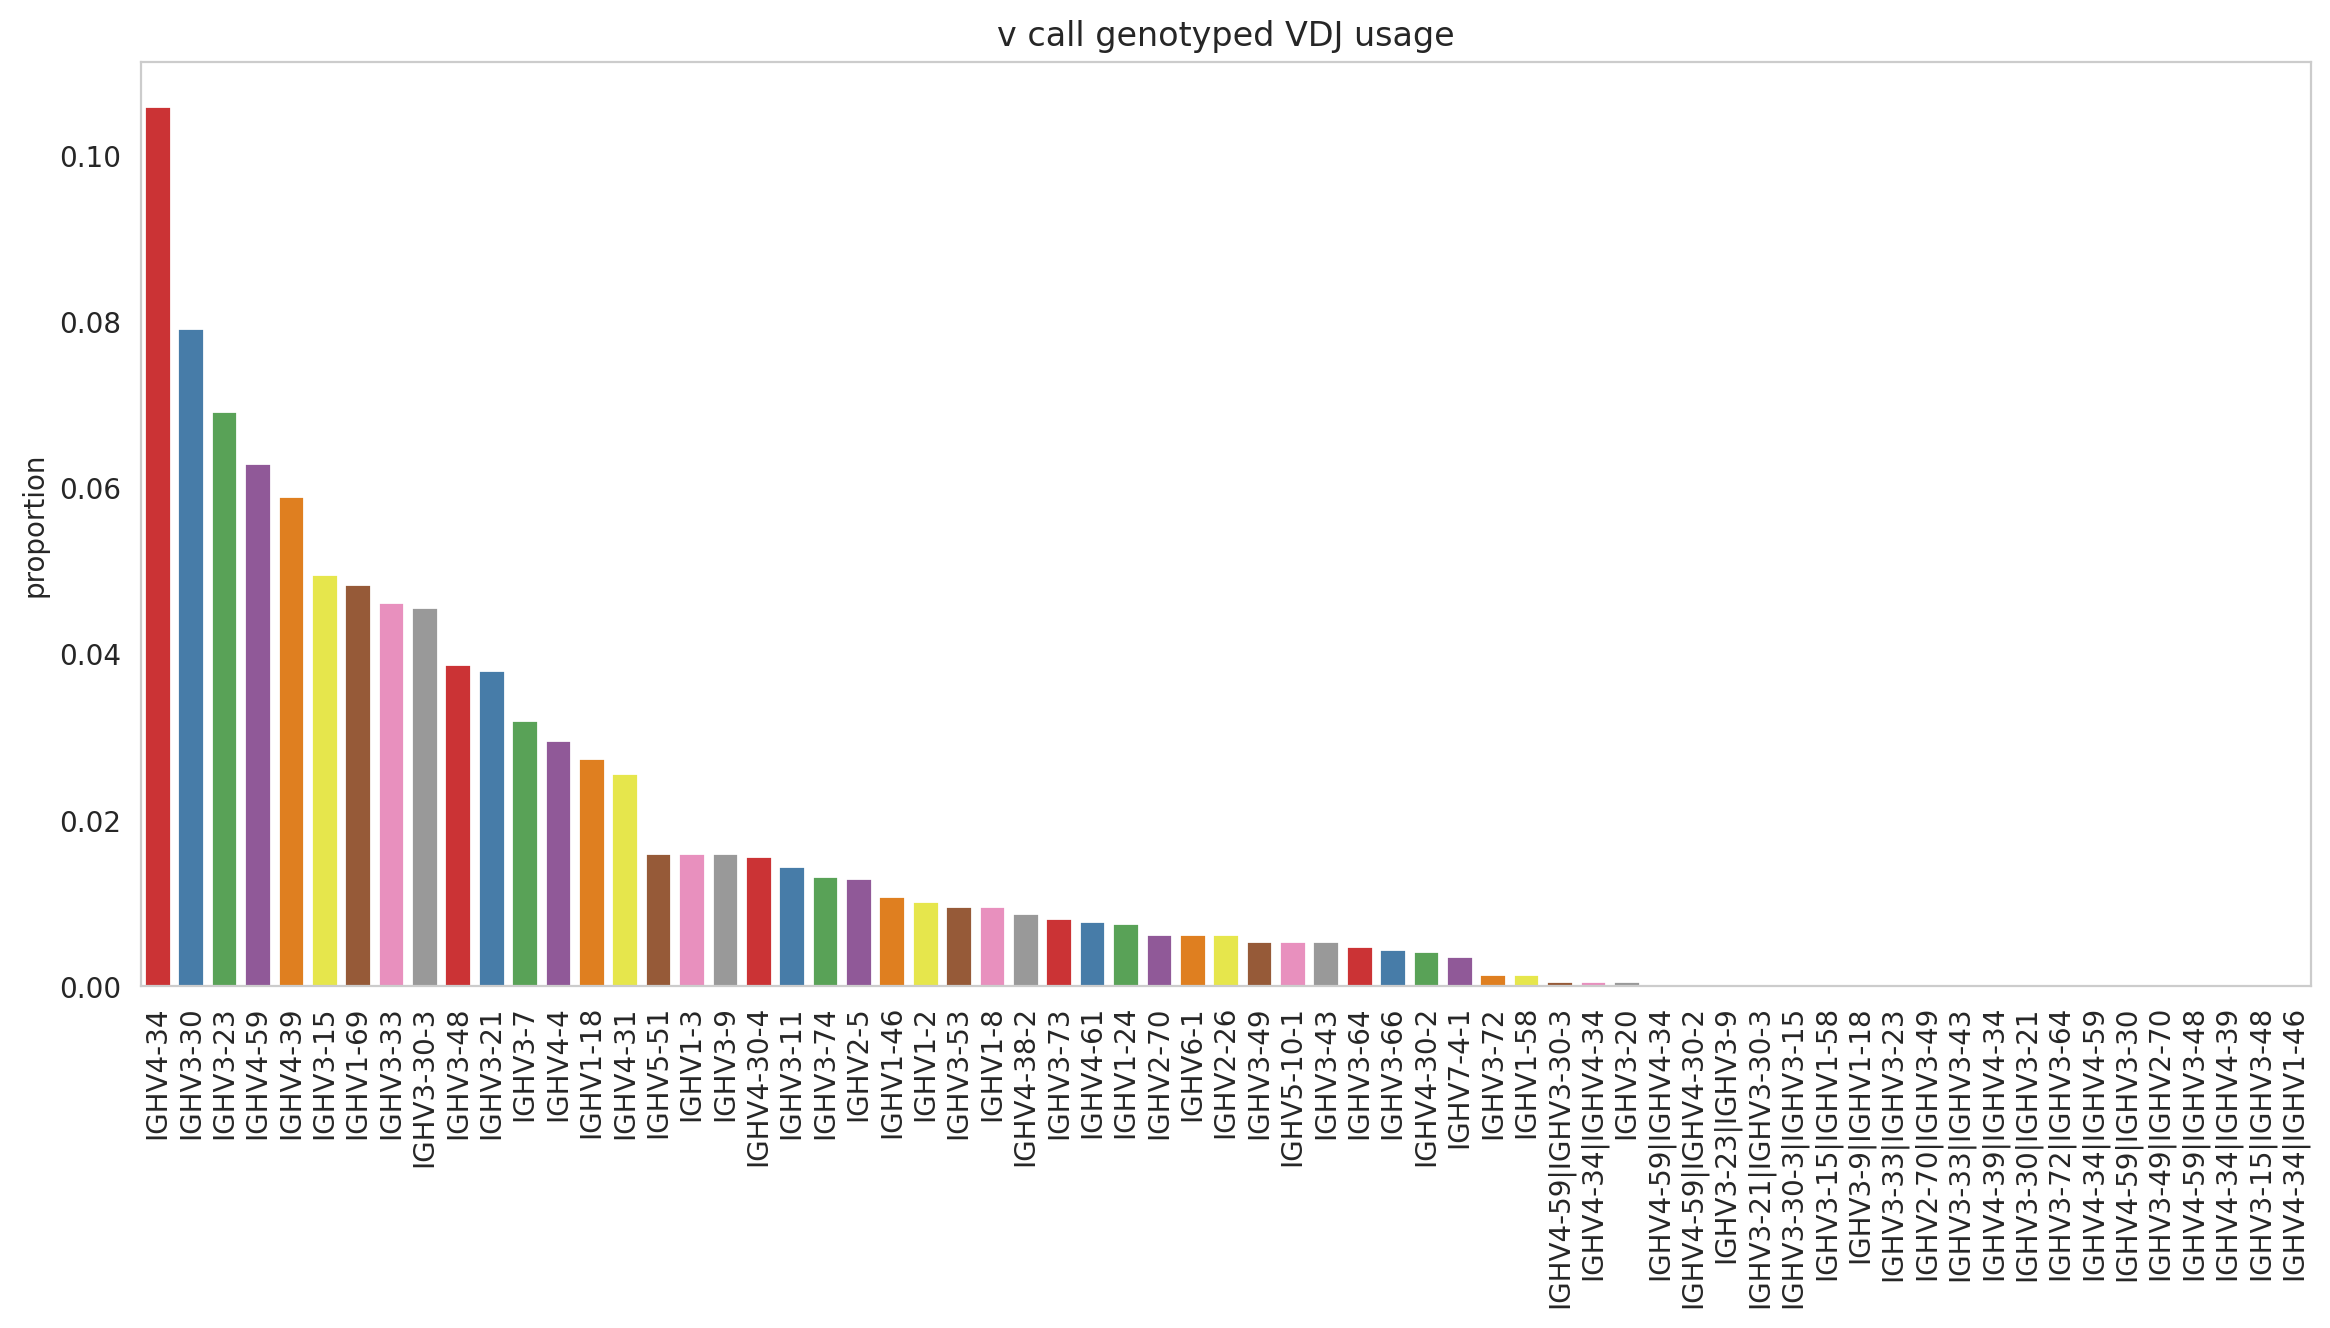

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = ddl.pl.barplot(vdj,
               color = 'v_call_genotyped_VDJ',
               figsize = (14, 6))
fig.savefig("output.pdf", bbox_inches="tight")

[0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75]


array([[[53., 47., 19.],
        [36., 36., 10.],
        [46., 28., 23.],
        [48., 18., 15.],
        [15., 45., 10.],
        [19., 34.,  1.],
        [22., 24., 14.],
        [32., 14., 10.],
        [ 0., 42.,  6.],
        [30., 12.,  1.],
        [21., 15., 13.],
        [14., 22.,  8.],
        [ 8., 14.,  5.],
        [16., 10.,  9.],
        [20.,  7., 14.],
        [ 8.,  4.,  8.],
        [ 0., 17.,  3.],
        [ 5., 16.,  4.],
        [ 5.,  8.,  3.],
        [ 8.,  7.,  5.],
        [11.,  3.,  4.],
        [ 1., 10.,  3.],
        [ 3., 11.,  5.],
        [10.,  0.,  5.],
        [ 0.,  8.,  3.],
        [18.,  0.,  3.],
        [74., 38., 18.]],

       [[19., 23., 33.],
        [15., 49., 10.],
        [ 8., 35., 11.],
        [10., 20., 12.],
        [ 4., 33., 12.],
        [ 3., 44.,  7.],
        [ 7., 22., 14.],
        [ 6.,  9., 12.],
        [ 0., 53.,  5.],
        [10., 15.,  5.],
        [ 6., 13., 10.],
        [ 5., 21.,  4.],
        [ 5., 19.,  1.]

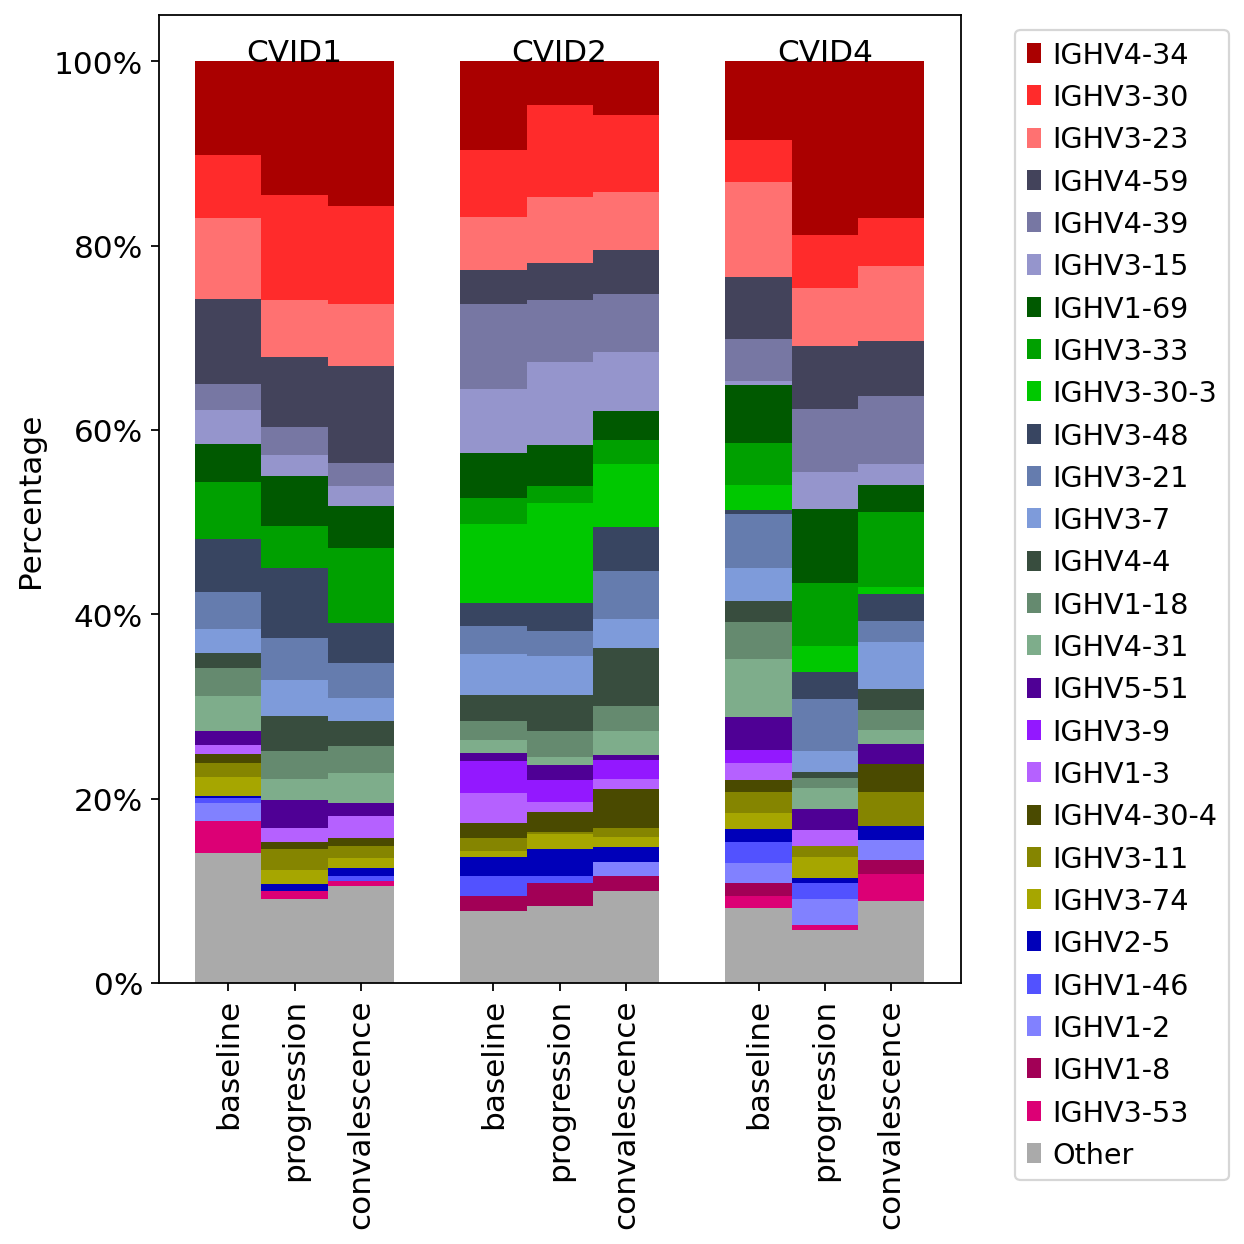

In [12]:
import lpy, imp
imp.reload(lpy)
flt =  ((adata.obs["v_call_genotyped_VDJ"]) !="") & [x not in ["doublet", "unassigned", "CVID3", "CVID5"] for x in adata.obs["demultiplexed"]]



adata.obs["tmp"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["v_call_genotyped_VDJ"] ],
{tuple([x for x,y in adata.obs["v_call_genotyped_VDJ"].value_counts().items() if y <30]) : "Other"})

dadico = {k:k for k,v in adata.obs["tmp"].value_counts().items() if k != "Other"}
dadico["Other"] = "Other"
dadico
adata.obs["tmp"] = lpy.applyFactorRename(["" if pd.isna(x) else x for x in adata.obs["tmp"] ] ,dadico)
adata.uns["tmp_colors"] = lpy.mydoublerainbow([4,3,3,3,3,3,3,3,2],selectedHues=[0,240,120,210,150,270,60,240,330],selectedSats=[1,0.5,1,0.7,0.5,1,1,1,1])
adata.uns["tmp_colors"].append("#AAAAAA")
sc.set_figure_params(figsize = [8,8])
lpy.makeBarplot(adata[flt], "tmp", "demultiplexed", "Stage",save="perCVID3.pdf", makeProportion=True, do_markG = True)
# 3178 Bcells

In [13]:
key = "v_call_genotyped_VDJ"
dico = {k:k for k,v in adata.obs[key].value_counts().items()}
adata.obs[key] = lpy.applyFactorRename(["" if pd.isna(x) else x for x in adata.obs[key] ] ,dico)
dico

{'IGHV4-34': 'IGHV4-34',
 'IGHV3-30': 'IGHV3-30',
 'IGHV3-23': 'IGHV3-23',
 'IGHV4-59': 'IGHV4-59',
 'IGHV4-39': 'IGHV4-39',
 'IGHV3-15': 'IGHV3-15',
 'IGHV1-69': 'IGHV1-69',
 'IGHV3-33': 'IGHV3-33',
 'IGHV3-30-3': 'IGHV3-30-3',
 'IGHV3-48': 'IGHV3-48',
 'IGHV3-21': 'IGHV3-21',
 'IGHV3-7': 'IGHV3-7',
 'IGHV4-4': 'IGHV4-4',
 'IGHV1-18': 'IGHV1-18',
 'IGHV4-31': 'IGHV4-31',
 'IGHV3-9': 'IGHV3-9',
 'IGHV1-3': 'IGHV1-3',
 'IGHV5-51': 'IGHV5-51',
 'IGHV4-30-4': 'IGHV4-30-4',
 'IGHV3-11': 'IGHV3-11',
 'IGHV3-74': 'IGHV3-74',
 'IGHV2-5': 'IGHV2-5',
 'IGHV1-46': 'IGHV1-46',
 'IGHV1-2': 'IGHV1-2',
 'IGHV1-8': 'IGHV1-8',
 'IGHV3-53': 'IGHV3-53',
 'IGHV4-38-2': 'IGHV4-38-2',
 'IGHV3-73': 'IGHV3-73',
 'IGHV4-61': 'IGHV4-61',
 'IGHV1-24': 'IGHV1-24',
 'IGHV6-1': 'IGHV6-1',
 'IGHV2-26': 'IGHV2-26',
 'IGHV2-70': 'IGHV2-70',
 'IGHV5-10-1': 'IGHV5-10-1',
 'IGHV3-43': 'IGHV3-43',
 'IGHV3-49': 'IGHV3-49',
 'IGHV3-64': 'IGHV3-64',
 'IGHV3-66': 'IGHV3-66',
 'IGHV4-30-2': 'IGHV4-30-2',
 'IGHV7-4-1': 'IGHV7-

In [14]:
{k:k for k,v in adata.obs[key].value_counts().items() if v > 0 and k is not None}

{'IGHV4-34': 'IGHV4-34',
 'IGHV3-30': 'IGHV3-30',
 'IGHV3-23': 'IGHV3-23',
 'IGHV4-59': 'IGHV4-59',
 'IGHV4-39': 'IGHV4-39',
 'IGHV3-15': 'IGHV3-15',
 'IGHV1-69': 'IGHV1-69',
 'IGHV3-33': 'IGHV3-33',
 'IGHV3-30-3': 'IGHV3-30-3',
 'IGHV3-48': 'IGHV3-48',
 'IGHV3-21': 'IGHV3-21',
 'IGHV3-7': 'IGHV3-7',
 'IGHV4-4': 'IGHV4-4',
 'IGHV1-18': 'IGHV1-18',
 'IGHV4-31': 'IGHV4-31',
 'IGHV3-9': 'IGHV3-9',
 'IGHV1-3': 'IGHV1-3',
 'IGHV5-51': 'IGHV5-51',
 'IGHV4-30-4': 'IGHV4-30-4',
 'IGHV3-11': 'IGHV3-11',
 'IGHV3-74': 'IGHV3-74',
 'IGHV2-5': 'IGHV2-5',
 'IGHV1-46': 'IGHV1-46',
 'IGHV1-2': 'IGHV1-2',
 'IGHV1-8': 'IGHV1-8',
 'IGHV3-53': 'IGHV3-53',
 'IGHV4-38-2': 'IGHV4-38-2',
 'IGHV3-73': 'IGHV3-73',
 'IGHV4-61': 'IGHV4-61',
 'IGHV1-24': 'IGHV1-24',
 'IGHV6-1': 'IGHV6-1',
 'IGHV2-26': 'IGHV2-26',
 'IGHV2-70': 'IGHV2-70',
 'IGHV5-10-1': 'IGHV5-10-1',
 'IGHV3-43': 'IGHV3-43',
 'IGHV3-49': 'IGHV3-49',
 'IGHV3-64': 'IGHV3-64',
 'IGHV3-66': 'IGHV3-66',
 'IGHV4-30-2': 'IGHV4-30-2',
 'IGHV7-4-1': 'IGHV7-

In [15]:
adata.obs[key].value_counts(sort = False)

IGHV1-2                 34
IGHV1-3                 53
IGHV1-8                 32
IGHV1-18                91
IGHV1-24                25
IGHV1-46                36
IGHV1-58                 5
IGHV1-69               160
IGHV2-5                 43
IGHV2-26                21
IGHV2-70                21
IGHV2-70|IGHV3-49        1
IGHV3-7                106
IGHV3-9                 53
IGHV3-9|IGHV1-18         1
IGHV3-11                48
IGHV3-15               164
IGHV3-15|IGHV1-58        1
IGHV3-15|IGHV3-48        1
IGHV3-20                 2
IGHV3-21               126
IGHV3-21|IGHV3-30-3      1
IGHV3-23               229
IGHV3-23|IGHV3-9         1
IGHV3-30               262
IGHV3-30-3             151
IGHV3-30-3|IGHV3-15      1
IGHV3-30|IGHV3-21        1
IGHV3-33               153
IGHV3-33|IGHV3-23        1
IGHV3-33|IGHV3-43        1
IGHV3-43                18
IGHV3-48               128
IGHV3-49                18
IGHV3-49|IGHV2-70        1
IGHV3-53                32
IGHV3-64                16
I

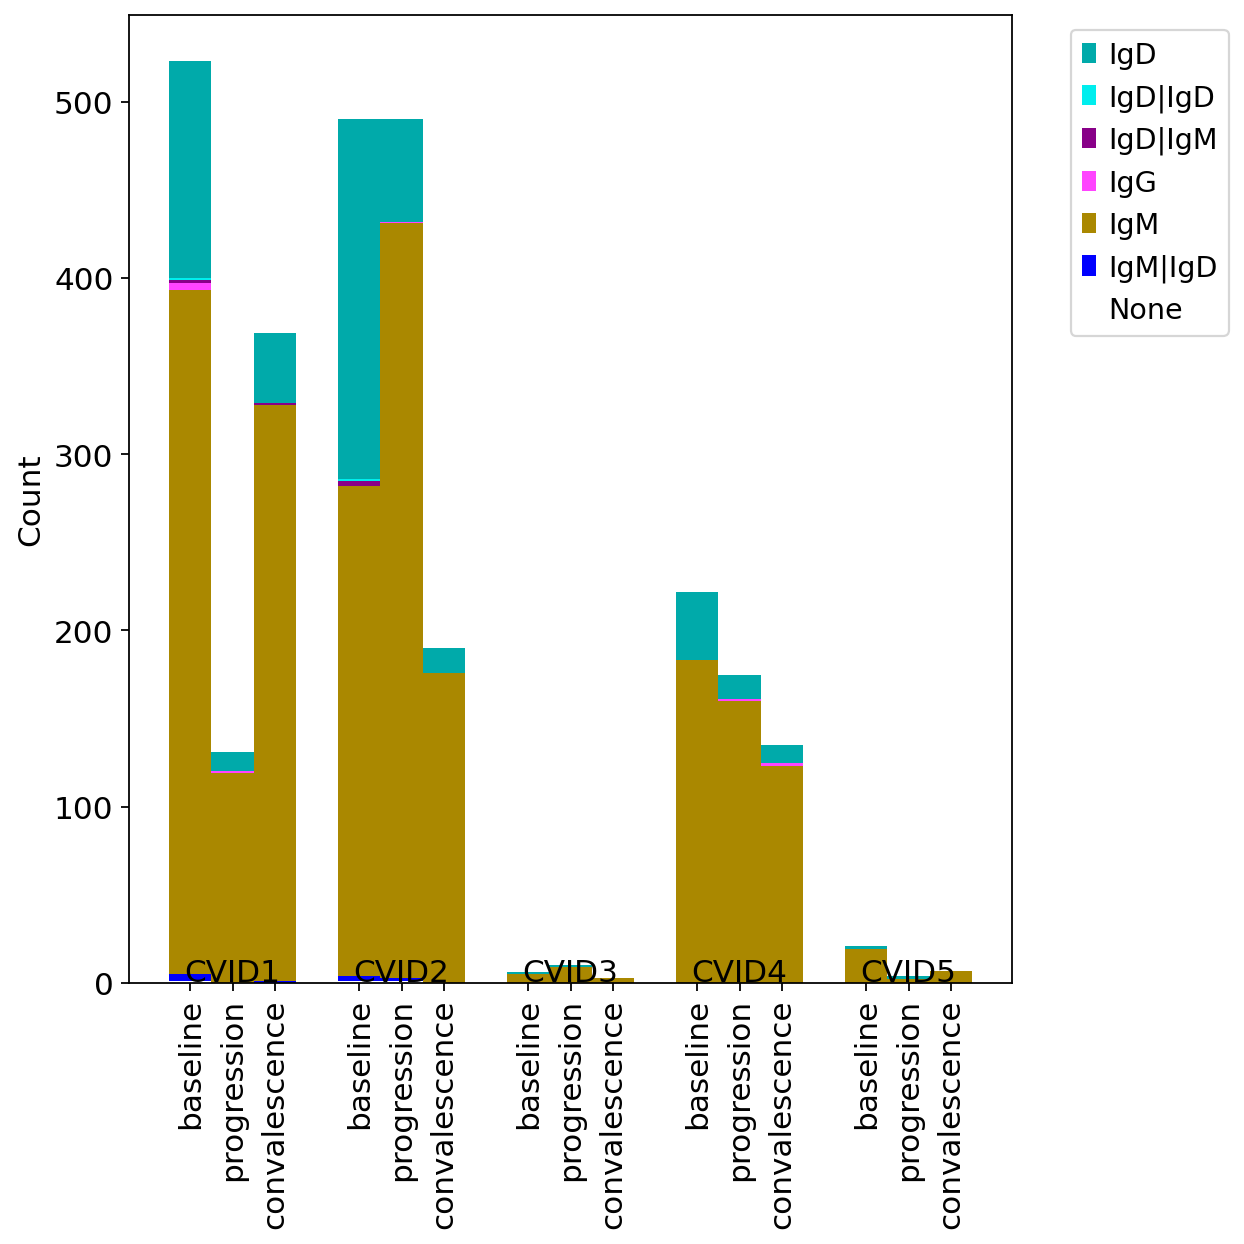

In [16]:
import lpy, imp
imp.reload(lpy)
flt =  ((adata.obs["v_call_genotyped_VDJ"]) !="") & [x not in ["doublet", "unassigned"] for x in adata.obs["demultiplexed"]]
adata.obs["isotype"] = pd.Categorical(adata.obs["isotype"])
adata.uns["isotype_colors"] = ["#00AAAA","#00EEEE","#880088","#FF44FF","#AA8800","#0000FF","#FFFFFF"]
res = lpy.makeBarplot(adata[flt], "isotype", "demultiplexed", "Stage",save="type2.pdf", do_markG = True, makeProportion=False)
# 3178 Bcells

In [17]:
import lpy, imp
imp.reload(lpy)
flt =  (pd.isna(adata.obs["v_call_genotyped_VDJ"]) == False) & [x not in ["doublet", "unassigned"] for x in adata.obs["demultiplexed"]] & [x in ["CVID1", "CVID2", "CVID4"] for x in adata.obs["patientID"]]
adata.obs["tmp"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["v_call_genotyped_VDJ"] ],
{tuple([x for x,y in adata.obs["v_call_genotyped_VDJ"].value_counts().items() if y <30]) : "Other"}
                                        )
sc.set_figure_params(figsize = [8,8])
lpy.makeBarplot(adata[flt], "tmp", "demultiplexed", "Stage",save="perCVID.png", makeProportion=True)
# 3178 Bcells

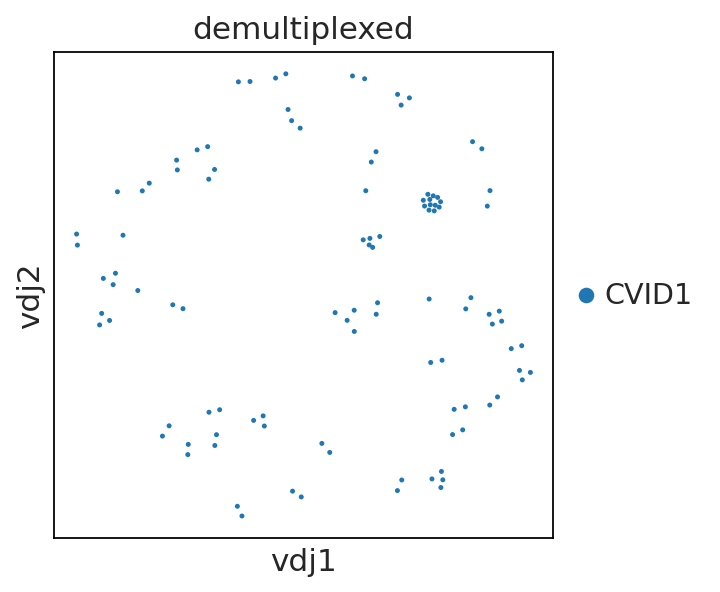

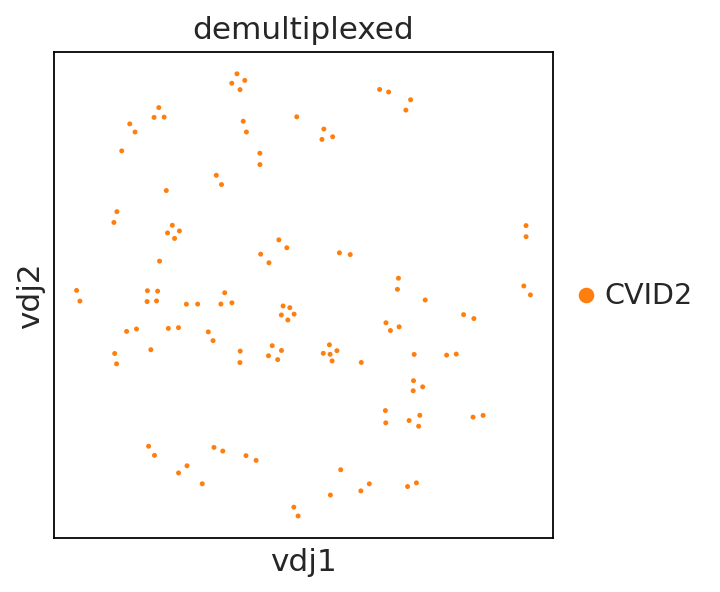

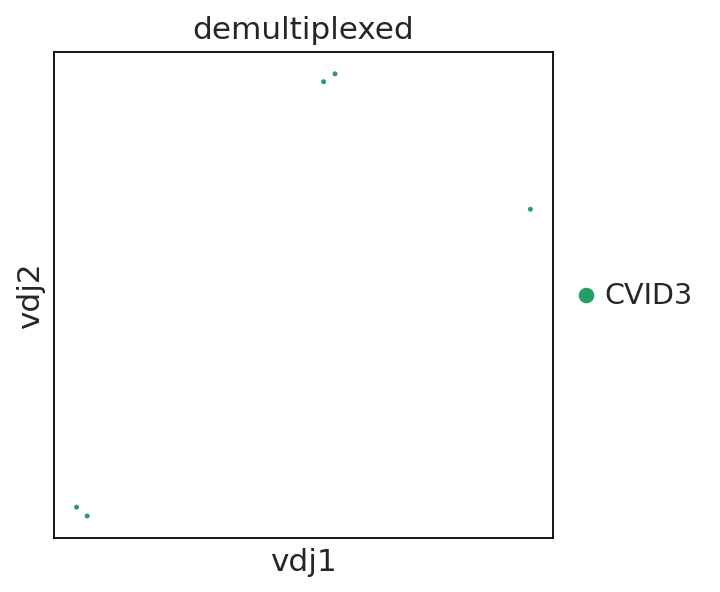

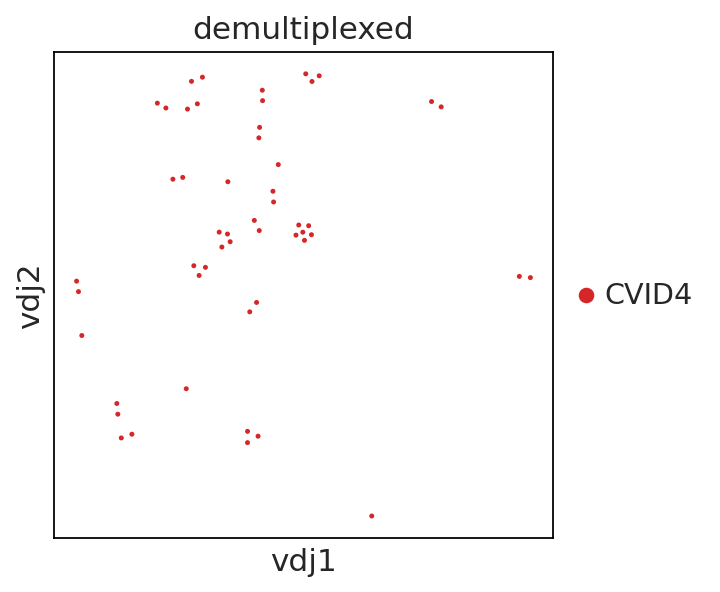

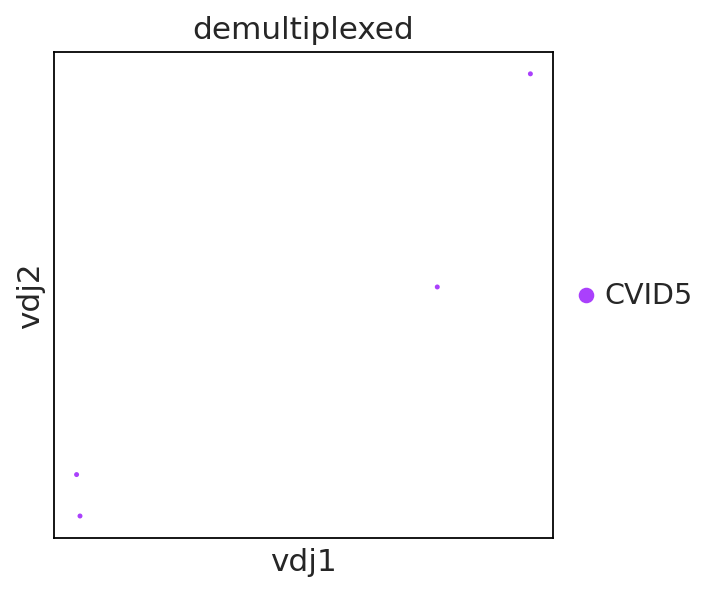

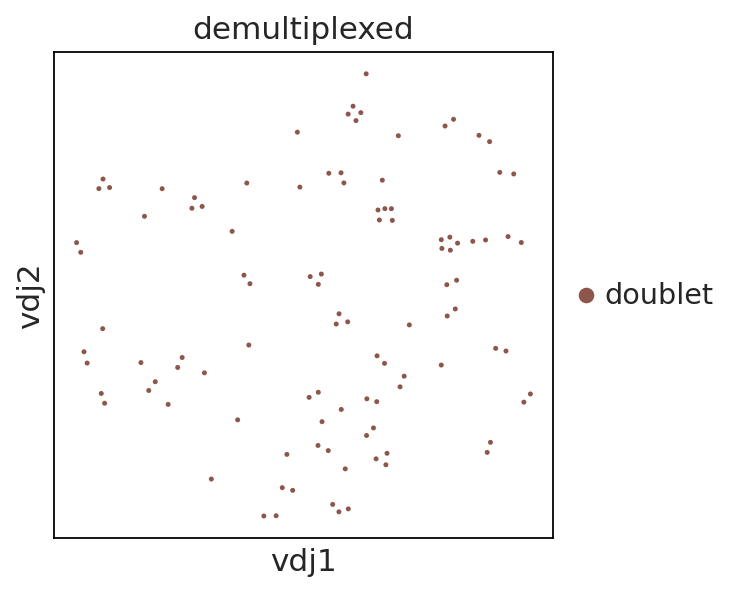

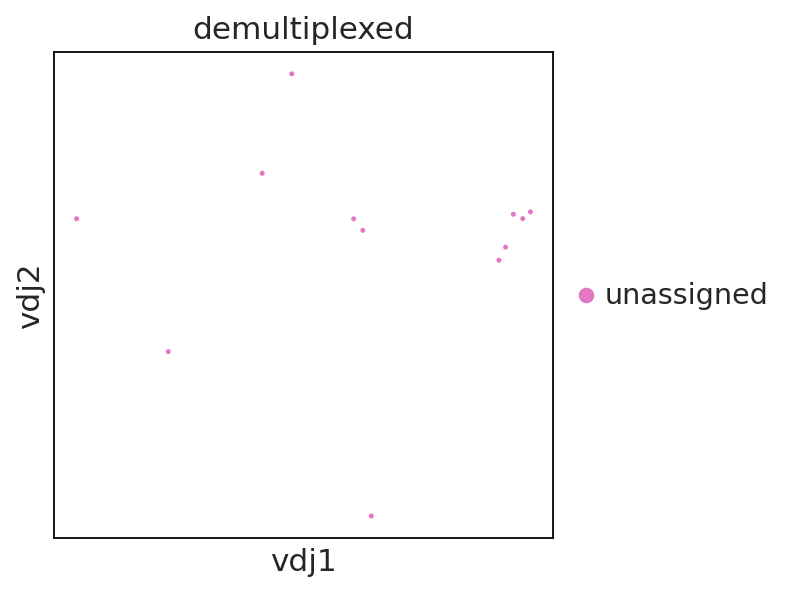

In [18]:
import numpy as np
sc.set_figure_params(figsize = [4,4])
if vdj.graph is not None:
    if vdj.layout is not None:
        coord = pd.DataFrame.from_dict(vdj.layout[1], orient="index")
        tmp = pd.DataFrame(index= adata.obs_names)
        for x in coord.columns:
            tmp[x] = coord[x]
        adata.obsm["X_vdj"] = np.array(tmp[[0, 1]], dtype=np.float32)
for i in adata.obs['demultiplexed'].cat.categories:
    ddl.pl.clone_network(adata[adata.obs['demultiplexed'] == i],
                         color = ['demultiplexed'],
                         edges_width = 1,
                         size = 20, edges=False,save = i+"_dande.pdf")
sdico = {0 : [0,0.25],1 : [0.25,0.25],2 : [0.5,0.02],3 : [0.52,0.25],4 : [0.77,0.02],5 : [0.79,0.2],6 : [0.99,0.01]}
adata.obsm["X_vdj2"] = adata.obsm["X_vdj"].copy()
adata.obsm["X_vdj2"][:,0] = [math.atan2(x,y) for x,y in zip(adata.obsm["X_vdj"][:,0],adata.obsm["X_vdj"][:,1])]
adata.obsm["X_vdj2"][:,1] = [math.sqrt(x*x+ y*y) for x,y in zip(adata.obsm["X_vdj"][:,0],adata.obsm["X_vdj"][:,1])]
adata.obsm["X_vdj"][:,0] = [math.cos(sdico[z][0] *6.28+(x+3.14)*sdico[z][1])*y for x,y,z in zip(adata.obsm["X_vdj2"][:,0],adata.obsm["X_vdj2"][:,1],adata.obs['demultiplexed'].cat.codes)]
adata.obsm["X_vdj"][:,1] = [math.sin(sdico[z][0] *6.28+(x+3.14)*sdico[z][1])*y for x,y,z in zip(adata.obsm["X_vdj2"][:,0],adata.obsm["X_vdj2"][:,1],adata.obs['demultiplexed'].cat.codes)]


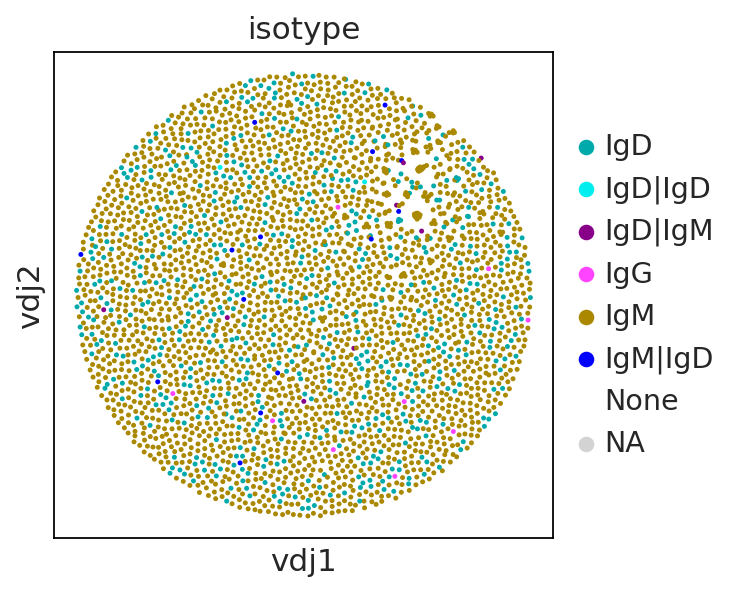

In [19]:

sc.set_figure_params(figsize = [4,4],vector_friendly=False)
if vdj.graph is not None:
    if vdj.layout is not None:
        coord = pd.DataFrame.from_dict(vdj.layout[0], orient="index")
        tmp = pd.DataFrame(index= adata.obs_names)
        for x in coord.columns:
            tmp[x] = coord[x]
        adata.obsm["X_vdj"] = np.array(tmp[[0, 1]], dtype=np.float32)
ddl.pl.clone_network(adata,
                     color = ['isotype'],
                     edges_width = 1,
                     size = 20, edges=False,save = "dande2.pdf")


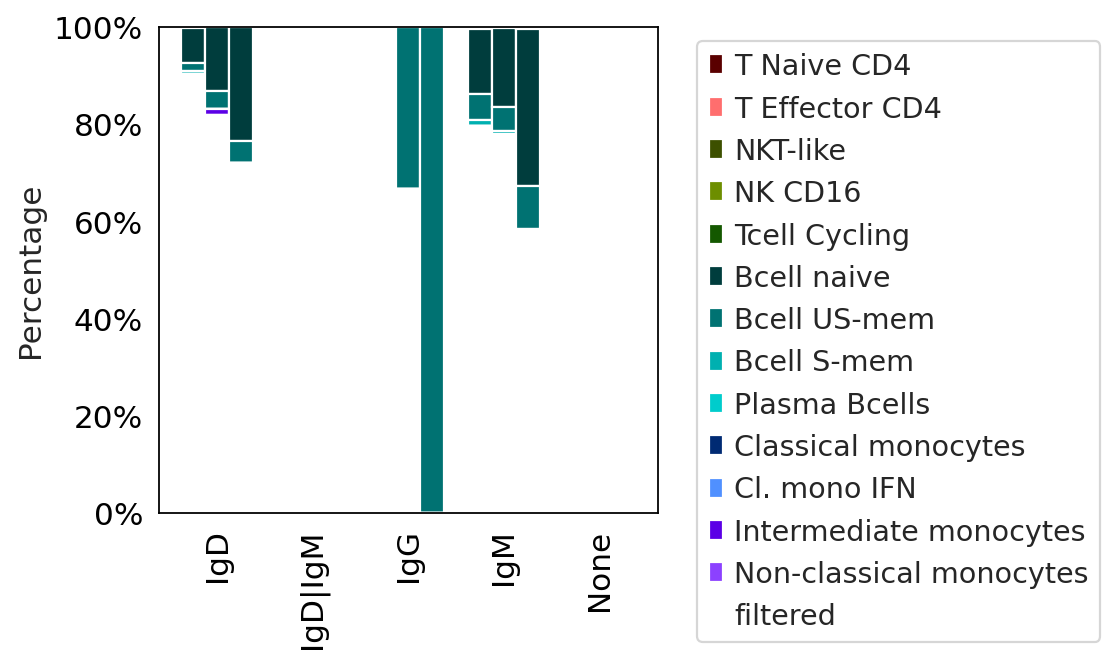

In [20]:
import lpy, imp
imp.reload(lpy)
sc.set_figure_params(figsize = [4,4])
res = lpy.makeBarplot(adata[flt], "general_integrated2", "isotype", "Stage",save="type.png")
# 3178 Bcells

In [21]:
TCRdata = pd.read_csv("../../javi/china_TBCR/GSE158055_covid19_BCR_TCR/GSE158055_covid19_tcr_vdjnt_pclone.tsv.gz", sep='\t')
tdico = { y + "_" + x : z for x,y,z in zip(TCRdata["cellBarcode"], TCRdata["sampleID"], range(TCRdata.shape[0]))}

for i in ["TRA_V_Gene","TRA_J_Gene", "TRB_V_Gene", "TRB_J_Gene", "TR_C_Genes","TR_D_Genes"]:
    adata.obs[i] = [x for x in adata.obs[i] ]

adata.obs["VDJ_type"][ [x in tdico for x in adata.obs_names] ] = "TCR"
adata.obs["TRA_V_Gene"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRA_vgene"][tdico[x]] for x in adata.obs_names if x in tdico]
adata.obs["TRA_J_Gene"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRA_jgene"][tdico[x]] for x in adata.obs_names if x in tdico]
adata.obs["TRB_V_Gene"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRB_vgene"][tdico[x]] for x in adata.obs_names if x in tdico]
adata.obs["TRB_J_Gene"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRB_jgene"][tdico[x]] for x in adata.obs_names if x in tdico]
adata.obs["TR_C_Genes"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRA_cgene"][tdico[x]] + "_" + TCRdata["TCRB_cgene"][tdico[x]] for x in adata.obs_names if x in tdico]
adata.obs["TR_D_Genes"][ [x in tdico for x in adata.obs_names] ] = [TCRdata["TCRA_dgene"][tdico[x]] + "_" + TCRdata["TCRB_dgene"][tdico[x]] for x in adata.obs_names if x in tdico]

BCRdata = pd.read_csv("../../javi/china_TBCR/GSE158055_covid19_BCR_TCR/GSE158055_covid19_bcr_vdjnt_pclone.tsv.gz", sep='\t')
bdico = { y + "_" + x : z for x,y,z in zip(BCRdata["cellBarcode"], BCRdata["sampleID"], range(BCRdata.shape[0]))}
adata.obs["VDJ_type"][ [x in bdico for x in adata.obs_names] ] = "BCR"
adata.obs["TRA_V_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRH_vgene"][bdico[x]] for x in adata.obs_names if x in bdico]
adata.obs["TRA_J_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRH_jgene"][bdico[x]] for x in adata.obs_names if x in bdico]
adata.obs["TRB_V_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRL/K_vgene"][bdico[x]] for x in adata.obs_names if x in bdico]
adata.obs["TRB_J_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRL/K_jgene"][bdico[x]] for x in adata.obs_names if x in bdico]
adata.obs["TRB_V_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRH_cgene"][bdico[x]] + "_" + BCRdata["BCRL/K_cgene"][bdico[x]] for x in adata.obs_names if x in bdico]
adata.obs["TRB_J_Gene"][ [x in bdico for x in adata.obs_names] ] = [BCRdata["BCRH_dgene"][bdico[x]] + "_" + BCRdata["BCRL/K_dgene"][bdico[x]] for x in adata.obs_names if x in bdico]

for i in ["TRA_V_Gene","TRA_J_Gene", "TRB_V_Gene", "TRB_J_Gene", "TR_C_Genes","TR_D_Genes"]:
    adata.obs[i] = pd.Categorical([x for x in adata.obs[i]])

In [22]:
lpy.RTable(adata.obs, "StudyName", "VDJ_type")

,BCR,NONE,TCR
China,10063,104115,28628
Haniffa,0,95548,0
Javi,3550,93590,37226


In [23]:
namedico = {x:0 for x in BCRdata["cellBarcode"]}
sum([x in namedico for x in adata.obs_names])

10063

In [24]:
TCRdata = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/tconcat/outs/vdj_t/filtered_contig_annotations.csv")
BCRdata = pd.read_csv("/lustre/scratch117/cellgen/team292/lh20/bconcat/outs/vdj_b/filtered_contig_annotations.csv")
tmp = TCRdata[TCRdata["chain"] == "TRA"]
vA = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jA = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cA = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dA = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = TCRdata[TCRdata["chain"] == "TRB"]
vB = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jB = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cB = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dB = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = BCRdata[BCRdata["chain"] == "IGH"]
vA_ = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jA_ = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cA_ = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dA_ = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}
tmp = BCRdata[BCRdata["chain"] != "IGH"]
vB_ = {tmp["raw_clonotype_id"][x] : tmp["v_gene"][x]  for x in tmp.index}
jB_ = {tmp["raw_clonotype_id"][x] : tmp["j_gene"][x]  for x in tmp.index}
cB_ = {tmp["raw_clonotype_id"][x] : tmp["c_gene"][x]  for x in tmp.index}
dB_ = {tmp["raw_clonotype_id"][x] : tmp["d_gene"][x]  for x in tmp.index}

adata.obs["TRA_V_Gene"] = [ (vA[x] if x in vA  else "nan") if t == "TCR" else ((vA_[x] if x in vA_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]
adata.obs["TRA_J_Gene"] = [ (jA[x] if x in jA  else "nan") if t == "TCR" else ((jA_[x] if x in jA_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]
adata.obs["TRB_V_Gene"] = [(vB[x] if x in vB  else "nan") if t == "TCR" else ((vB_[x] if x in vB_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]
adata.obs["TRB_J_Gene"] = [(jB[x] if x in jB  else "nan") if t == "TCR" else ((jB_[x] if x in jB_  else "nan") if t == "BCR" else "None") for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]
adata.obs["TR_D_Genes"] = [str(dA[x] if x in dA  else "nan") + "_" +  str(dB[x] if x in dB  else "nan") if t == "TCR" else  (str(dA_[x] if x in dA_  else "nan") + "_" +  str(dB_[x] if x in dB_  else "nan") if t == "BCR" else "None")  for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]
adata.obs["TR_C_Genes"] = [str(cA[x] if x in cA  else "nan") + "_" + str(cB[x] if x in cB  else "nan") if t == "TCR" else  (str(cA_[x] if x in cA_  else "nan") + "_" + str(cB_[x] if x in cB_  else "nan") if t == "BCR" else "None")  for t,x in zip(adata.obs["VDJ_type"],adata2.obs["clonotype"]) ]


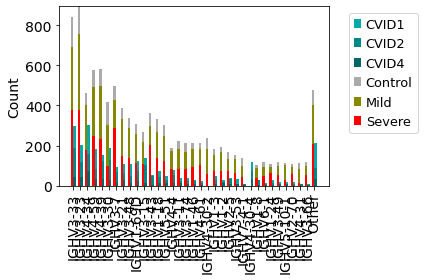

In [25]:
import lpy
adata.obs["tmp"] = [ z if z in ["CVID1","CVID2","CVID3","CVID4","CVID5"] else  y  for x,y,z in zip(adata.obs["Stage"], adata.obs["CovidSeverity"], adata.obs["demultiplexed"]) ]

import lpy, imp, scanpy as sc
imp.reload(lpy)

freq_table = adata.obs["TRA_V_Gene"].value_counts(sort=True)
renamedico = {x:x for x,y in freq_table.items()  if y>=100}
renamedico[tuple([x for x,y in freq_table.items() if y <100] + ["nan"])] = "Other"
adata.obs["tmp2"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["TRA_V_Gene"] ],renamedico)
sc.set_figure_params(figsize = [12,6], dpi_save=300) 
adata.obs["tmp"] = pd.Categorical([x for x in adata.obs["tmp"]] )
adata.uns["tmp_colors"] = ["#00AAAA","#008888","#008888","#006666","#008888","#AAAAAA","#888800","#FF0000"]
countTable = lpy.makeBarplot(adata[(pd.isna(adata.obs["tmp"]) == False)&(adata.obs["VDJ_type"] == "BCR")&([x not in ["CVID3", "CVID5", "doublet", "unassigned"] for x in adata.obs["demultiplexed"]])] , "tmp", "tmp2", "StudyName",save="gene_distribution2.pdf",makeProportion=False)


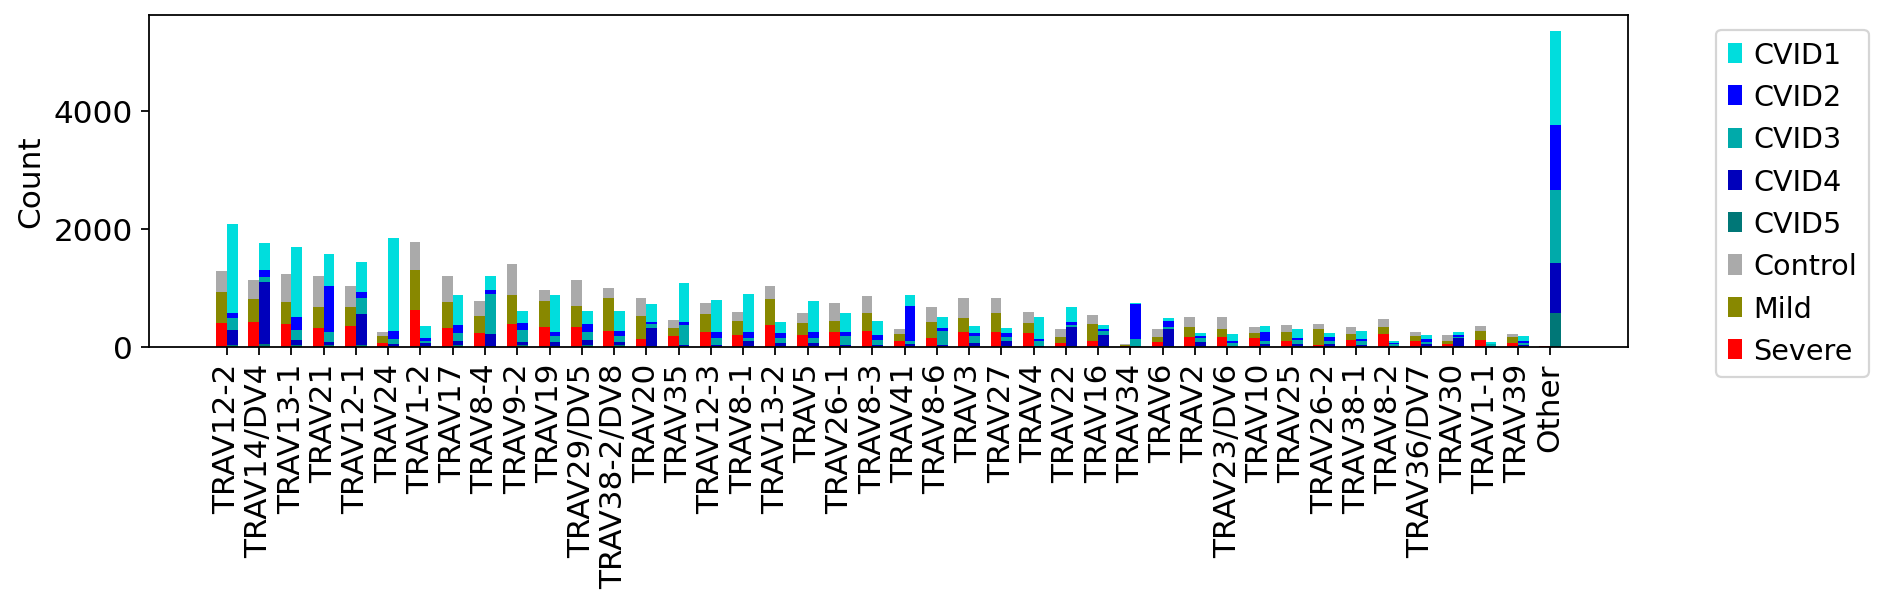

In [26]:
import lpy
adata.obs["tmp"] = [ z if z in ["CVID1","CVID2","CVID3","CVID4","CVID5"] else  y  for x,y,z in zip(adata.obs["Stage"], adata.obs["CovidSeverity"], adata.obs["demultiplexed"]) ]

import lpy, imp, scanpy as sc
imp.reload(lpy)

freq_table = adata.obs["TRA_V_Gene"].value_counts(sort=True)
renamedico = {x:x for x,y in freq_table.items()  if y>=100}
renamedico[tuple([x for x,y in freq_table.items() if y <100] + ["nan"])] = "Other"
adata.obs["tmp2"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["TRA_V_Gene"] ],renamedico)
sc.set_figure_params(figsize = [12,4])
adata.obs["tmp"] = pd.Categorical([x for x in adata.obs["tmp"]] )
adata.uns["tmp_colors"] = ["#00DDDD","#0000FF","#00AAAA","#0000BB","#007777","#AAAAAA","#888800","#FF0000"]
countTable = lpy.makeBarplot(adata[(pd.isna(adata.obs["tmp"]) == False)&(adata.obs["VDJ_type"] == "TCR")&([x not in ["doublet", "unassigned"] for x in adata.obs["demultiplexed"]])] , "tmp", "tmp2", "StudyName",save="gene_Tcell_distribution.pdf",makeProportion=False)


12434


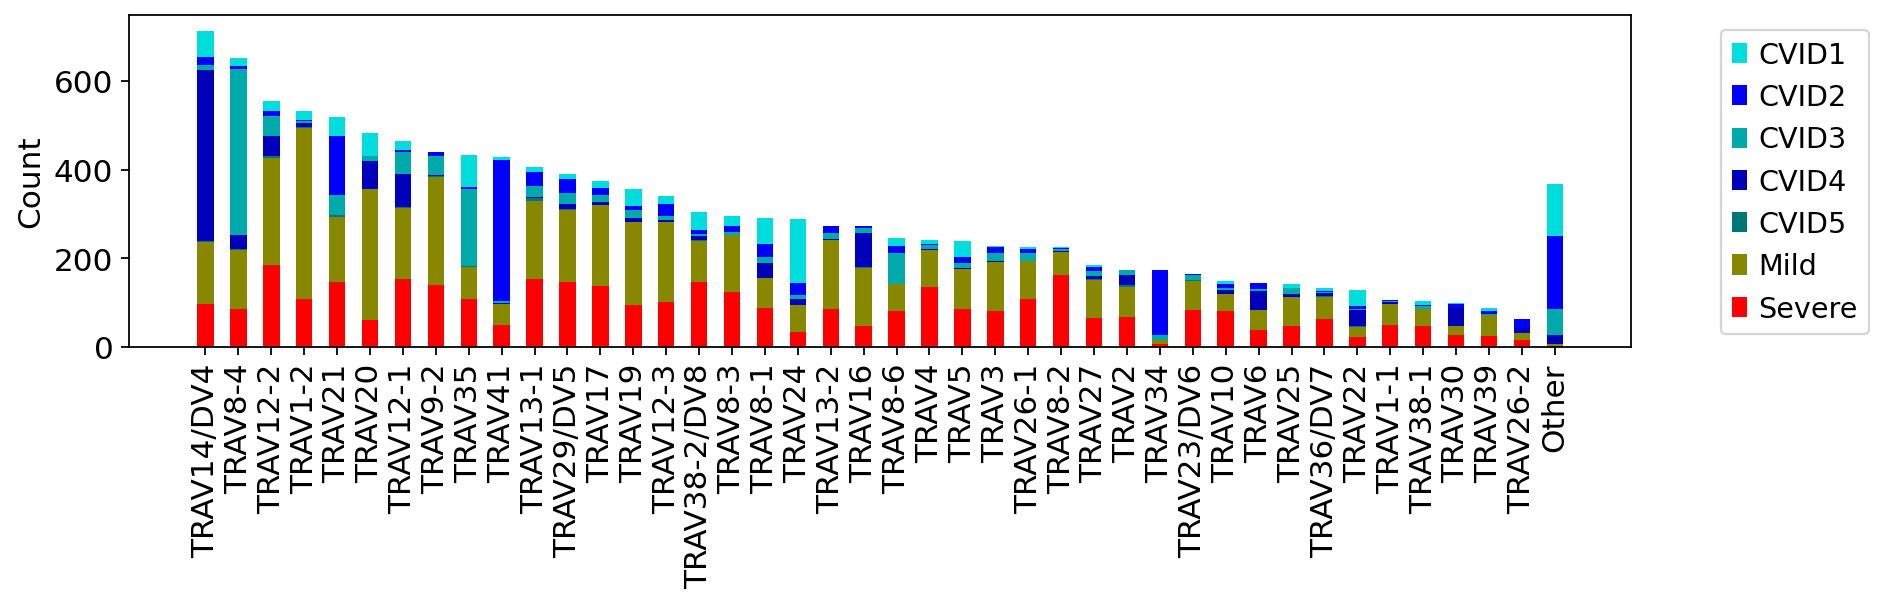

In [27]:
import lpy
adata.obs["tmp"] = [ z if z in ["CVID1","CVID2","CVID3","CVID4","CVID5"] else  y  for x,y,z in zip(adata.obs["Stage"], adata.obs["CovidSeverity"], adata.obs["demultiplexed"]) ]

import lpy, imp, scanpy as sc
imp.reload(lpy)
flt = (pd.isna(adata.obs["tmp"]) == False)&(adata.obs["VDJ_type"] == "TCR")&([x not in ["doublet", "unassigned"] for x in adata.obs["demultiplexed"]])
flt = flt & (adata.obs["Stage"] == "progression") & ([x not in ["TE CD8","Tcell Cycling"] for x in adata.obs["general_integrated2"]]) & (adata.obs["clonotype_class"] != "Unique")
print(sum(flt))
mincount = 20
freq_table = adata[flt].obs["TRA_V_Gene"].value_counts(sort=True)
renamedico = {x:x for x,y in freq_table.items()  if y>=mincount}
renamedico[tuple([x for x,y in freq_table.items() if y <mincount] + ["nan"])] = "Other"
adata.obs["tmp2"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["TRA_V_Gene"] ],renamedico)
sc.set_figure_params(figsize = [12,4])
adata.obs["tmp"] = pd.Categorical([x for x in adata.obs["tmp"]] )
adata.uns["tmp_colors"] = ["#00DDDD","#0000FF","#00AAAA","#0000BB","#007777","#AAAAAA","#888800","#FF0000"]
countTable = lpy.makeBarplot(adata[flt], "tmp", "tmp2",save="gene_Tcell.pdf",makeProportion=False)


In [28]:
import lpy, imp
imp.reload(lpy)
flt =  (pd.isna(adata.obs["v_call_genotyped_VDJ"]) == False) & [x not in ["doublet", "unassigned"] for x in adata.obs["demultiplexed"]]
adata.obs["tmp"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["v_call_genotyped_VDJ"] ],
{tuple([x for x,y in adata.obs["v_call_genotyped_VDJ"].value_counts().items() if y <30]) : "Other"}
                                        )
sc.set_figure_params(figsize = [8,8])
lpy.makeBarplot(adata[flt], "tmp", "demultiplexed", "Stage",save="perCVID.png", makeProportion=False)


array([[[ 50.,  85.,  96.],
        [ 62., 100.,  74.],
        [ 38.,  57.,  46.],
        [111., 178., 135.],
        [ 31.,  80.,  25.],
        [  1.,   1.,   2.],
        [ 53., 107.,  89.],
        [ 11.,  22.,  13.],
        [  7.,  17.,   4.],
        [  1.,   4.,   7.],
        [125., 195., 143.],
        [  1.,   0.,   1.],
        [ 58.,  90.,  66.],
        [ 16.,  29.,  32.],
        [ 26.,  74.,  30.],
        [124., 319., 161.],
        [ 68., 110., 101.],
        [ 16.,  23.,  17.],
        [138., 171., 132.],
        [ 17.,  30.,  33.],
        [119., 206., 186.],
        [267., 369., 493.],
        [215., 238., 190.],
        [319., 486., 387.],
        [103., 245.,  88.],
        [113., 206., 154.],
        [ 23.,  52.,  60.],
        [ 47.,  77.,  63.],
        [  8.,  17.,  16.],
        [ 19.,  29.,  18.],
        [ 22.,  56.,  50.],
        [ 15.,  26.,  15.],
        [ 22.,  32.,  33.],
        [ 63.,  95.,  97.],
        [  0.,   2.,   1.],
        [  0.,   0.,

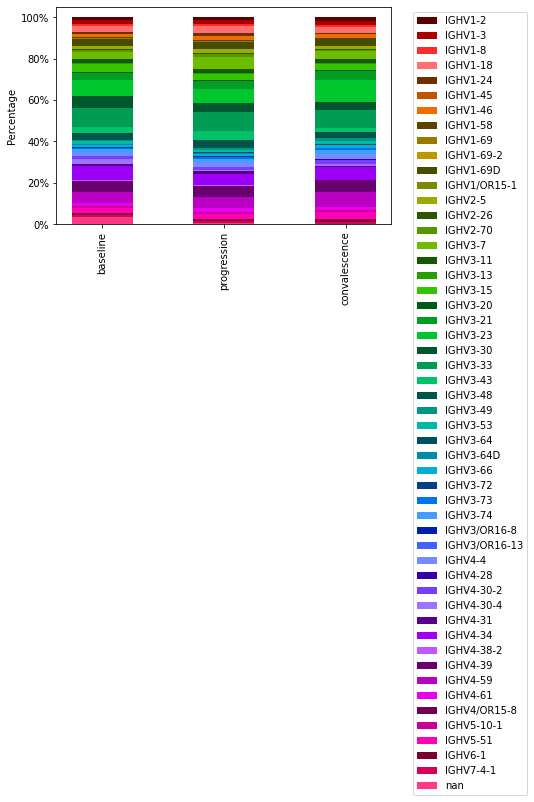

In [29]:
adata.obs["tmp"] =lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["v_call_genotyped_VDJ"] ],

lpy.makeBarplot(adata[(adata.obs["VDJ_type"] == "BCR")].obs,"TRA_V_Gene", "tmp")

array([[[1.700e+01, 1.000e+00, 3.000e+00, 7.800e+01, 0.000e+00,
         1.200e+02, 6.810e+02, 7.200e+01, 1.000e+00, 0.000e+00,
         2.500e+01, 1.100e+01, 0.000e+00, 9.000e+00, 0.000e+00,
         4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 6.900e+01],
        [3.700e+01, 2.900e+01, 1.600e+01, 1.520e+02, 3.000e+00,
         1.890e+02, 1.549e+03, 4.560e+02, 3.000e+00, 0.000e+00,
         1.283e+03, 2.700e+01, 1.300e+01, 1.200e+01, 3.000e+00,
         5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 4.330e+02],
        [6.844e+03, 4.847e+03, 8.100e+02, 1.423e+03, 1.561e+03,
         2.966e+03, 3.547e+03, 1.816e+03, 2.270e+02, 5.000e+00,
         7.250e+02, 1.836e+03, 8.940e+02, 6.600e+01, 5.800e+01,
         7.180e+02, 0.000e+00, 0.000e+

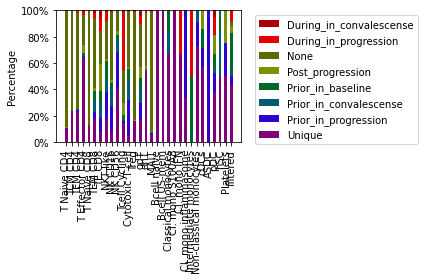

In [30]:
import lpy
lpy.makeBarplot(adata[(adata.obs["VDJ_type"] == "TCR")].obs,"clonotype_class", "general_integrated2")

In [31]:
lpy.RTable(adata.obs, "VDJ_type", "TRA_V_Gene")

,IGHV1-2,IGHV1-3,IGHV1-8,IGHV1-18,IGHV1-24,IGHV1-45,IGHV1-46,IGHV1-58,IGHV1-69,IGHV1-69-2,IGHV1-69D,IGHV1/OR15-1,IGHV2-5,IGHV2-26,IGHV2-70,IGHV3-7,IGHV3-11,IGHV3-13,IGHV3-15,IGHV3-20,IGHV3-21,IGHV3-23,IGHV3-30,IGHV3-33,IGHV3-43,IGHV3-48,IGHV3-49,IGHV3-53,IGHV3-64,IGHV3-64D,IGHV3-66,IGHV3-72,IGHV3-73,IGHV3-74,IGHV3/OR16-8,IGHV3/OR16-13,IGHV4-4,IGHV4-28,IGHV4-30-2,IGHV4-30-4,IGHV4-31,IGHV4-34,IGHV4-38-2,IGHV4-39,IGHV4-59,IGHV4-61,IGHV4/OR15-8,IGHV5-10-1,IGHV5-51,IGHV6-1,IGHV7-4-1,None,TRAV1-1,TRAV1-2,TRAV2,TRAV3,TRAV4,TRAV5,TRAV6,TRAV8-1,TRAV8-2,TRAV8-3,TRAV8-4,TRAV8-6,TRAV9-1,TRAV9-2,TRAV10,TRAV12-1,TRAV12-2,TRAV12-3,TRAV13-1,TRAV13-2,TRAV14/DV4,TRAV16,TRAV17,TRAV18,TRAV19,TRAV20,TRAV21,TRAV22,TRAV23/DV6,TRAV24,TRAV25,TRAV26-1,TRAV26-2,TRAV27,TRAV29/DV5,TRAV30,TRAV34,TRAV35,TRAV36/DV7,TRAV38-1,TRAV38-2/DV8,TRAV39,TRAV40,TRAV41,nan
BCR,231,236,141,424,136,4,249,46,28,12,463,2,214,77,130,604,279,56,441,80,511,1129,643,1192,436,473,135,187,41,66,128,56,87,255,3,1,286,16,238,145,129,830,29,771,789,240,5,131,356,137,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167
NONE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,459,2165,758,1228,1127,1423,821,1564,605,1339,2138,1245,2,2094,728,2622,3468,1581,3033,1503,3059,947,2165,1,1910,1637,2921,1041,748,2250,697,1354,661,1196,1819,480,868,1635,482,645,1674,407,60,1246,6048


In [32]:

adata.obs["tmp"] = [ "CVID_" + x + "_" + w if z == "Javi" else  y + "_" + x + "_" + w for x,y,z,w in zip(adata.obs["Stage"], adata.obs["CovidSeverity"], adata.obs["StudyName"], adata.obs["tmp3"]) ]
adatasub = adata[(adata.obs["VDJ_type"] == "BCR")&(adata.obs["TRA_V_Gene"] != "None")&(adata.obs["StudyName"] == "Javi")]
res = lpy.RTable(adatasub.obs, "TRA_V_Gene", "tmp")
res

,CVID_baseline_Naive,CVID_baseline_Non-naive,CVID_progression_filtered,CVID_baseline_CD19low,CVID_progression_Naive,CVID_convalescence_Non-naive,CVID_convalescence_filtered,CVID_baseline_filtered,CVID_convalescence_Naive,CVID_convalescence_CD19low,CVID_progression_CD19low,CVID_progression_Non-naive
IGHV1-2,11,1,1,1,5,0,2,9,5,0,1,0
IGHV1-3,15,4,5,2,5,0,3,11,7,0,2,0
IGHV1-8,10,1,3,0,10,0,0,8,4,0,0,0
IGHV1-18,20,3,9,6,14,1,9,17,7,1,3,0
IGHV1-24,9,2,2,2,7,0,2,2,2,0,0,0
IGHV1-46,13,1,4,1,7,0,1,8,1,0,0,0
IGHV1-58,1,0,0,0,1,0,1,5,0,0,0,0
IGHV1-69,2,0,0,1,2,0,0,3,1,0,1,0
IGHV1-69D,41,2,13,4,29,1,11,32,17,1,4,2
IGHV2-5,8,2,1,3,10,2,1,7,5,0,3,2


In [33]:
adata.obs["tmp3"] = lpy.applyFactorRename(["NA" if pd.isna(x) else x for x in adata.obs["leiden_bcell"] ],{
    tuple(["0","1","3","4","5","8","9",]): "Naive",
    tuple(["7"]): "Non-naive",
    tuple(["6"]): "CD19low",
    tuple(["2","filtered"]): "filtered"})


In [34]:
res.to_csv("BRCTable3.csv")